### Проанализируйте подневный график поисковой доли Яндекса на десктопе по данным Яндекс.Радара за весь доступный период. 

### Опишите наблюдаемые закономерности, объясните и попробуйте классифицировать замеченные аномалии.

In [301]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

### Загрузим датасет по дням с данными о визитах и долях поисковиков:
    - Yandex
    - Google
    - Mail.ru
    - Rambler
    - Другие

In [302]:
search = pd.read_csv('search.csv')

In [303]:
search.head()

,Время,"Rambler, Визиты","Rambler, Доля","Mail.ru, Визиты","Mail.ru, Доля","Google, Визиты","Google, Доля","Яндекс, Визиты","Яндекс, Доля","Остальные, Визиты","Остальные, Доля"
0,2015-01-01 - 2015-01-01,741225,0.009174,6446539,0.079792,20012764,0.247706,50680397,0.627293,2911330,0.036035
1,2015-01-02 - 2015-01-02,946437,0.009170,7995399,0.077463,25294959,0.245069,65303223,0.632687,3675662,0.035611
2,2015-01-03 - 2015-01-03,985794,0.008912,8552026,0.077311,27011850,0.244191,70150340,0.634168,3917910,0.035418
3,2015-01-04 - 2015-01-04,1021004,0.008947,8738732,0.076579,27816676,0.243761,72520143,0.635503,4017944,0.035210
4,2015-01-05 - 2015-01-05,1040457,0.008849,8971597,0.076303,28705422,0.244138,74754084,0.635780,4106972,0.034930


In [304]:
search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
Время                1725 non-null object
Rambler, Визиты      1725 non-null int64
Rambler, Доля        1725 non-null float64
Mail.ru, Визиты      1725 non-null int64
Mail.ru, Доля        1725 non-null float64
Google, Визиты       1725 non-null int64
Google, Доля         1725 non-null float64
Яндекс, Визиты       1725 non-null int64
Яндекс, Доля         1725 non-null float64
Остальные, Визиты    1725 non-null int64
Остальные, Доля      1725 non-null float64
dtypes: float64(5), int64(5), object(1)
memory usage: 148.3+ KB


### Проверим на пропуски и дубликаты данных

In [305]:
print(search.isna().sum(), search.duplicated().sum())

Время                0
Rambler, Визиты      0
Rambler, Доля        0
Mail.ru, Визиты      0
Mail.ru, Доля        0
Google, Визиты       0
Google, Доля         0
Яндекс, Визиты       0
Яндекс, Доля         0
Остальные, Визиты    0
Остальные, Доля      0
dtype: int64 0


### Приведем типы данных / рассчитаем необходимы значения:
    - поле "date" приведем к типу datetime
    - рассчитаем номер месяца - month_num
    - рассчитаем номер недели - week_num
    - рассчитаем месяц - month
    - рассчитаем год - year
    - рассчитаем день недели - weekday
    - рассчитаем дату начала недели - week
    - рассчитаем дату без года - weekday    

In [306]:
search['date'] = pd.to_datetime(search['Время'].map(lambda x: str(x[0:10])), format='%Y-%m-%d')
search['month'] = search['date'].map(lambda x: x.strftime('%Y-%m'))
search['month_num'] = search['date'].dt.month
search['week_num'] = search['date'].dt.week
search['year'] = search['date'].dt.year
search['weekday'] = search['date'].dt.weekday
search['week'] = ( pd.to_datetime(search['date'], unit='d')
    - pd.to_timedelta(search['date'].dt.dayofweek, unit='d'))
search['noyear'] = search['date'].map(lambda x: x.strftime('%m-%d'))

In [307]:
search.head()

,Время,"Rambler, Визиты","Rambler, Доля","Mail.ru, Визиты","Mail.ru, Доля","Google, Визиты","Google, Доля","Яндекс, Визиты","Яндекс, Доля","Остальные, Визиты","Остальные, Доля",date,month,month_num,week_num,year,weekday,week,noyear
0,2015-01-01 - 2015-01-01,741225,0.009174,6446539,0.079792,20012764,0.247706,50680397,0.627293,2911330,0.036035,2015-01-01,2015-01,1,1,2015,3,2014-12-29,01-01
1,2015-01-02 - 2015-01-02,946437,0.009170,7995399,0.077463,25294959,0.245069,65303223,0.632687,3675662,0.035611,2015-01-02,2015-01,1,1,2015,4,2014-12-29,01-02
2,2015-01-03 - 2015-01-03,985794,0.008912,8552026,0.077311,27011850,0.244191,70150340,0.634168,3917910,0.035418,2015-01-03,2015-01,1,1,2015,5,2014-12-29,01-03
3,2015-01-04 - 2015-01-04,1021004,0.008947,8738732,0.076579,27816676,0.243761,72520143,0.635503,4017944,0.035210,2015-01-04,2015-01,1,1,2015,6,2014-12-29,01-04
4,2015-01-05 - 2015-01-05,1040457,0.008849,8971597,0.076303,28705422,0.244138,74754084,0.635780,4106972,0.034930,2015-01-05,2015-01,1,2,2015,0,2015-01-05,01-05


### Для обзора сформируем подневные графики для количества визитов и доли поисковиков по десктопам

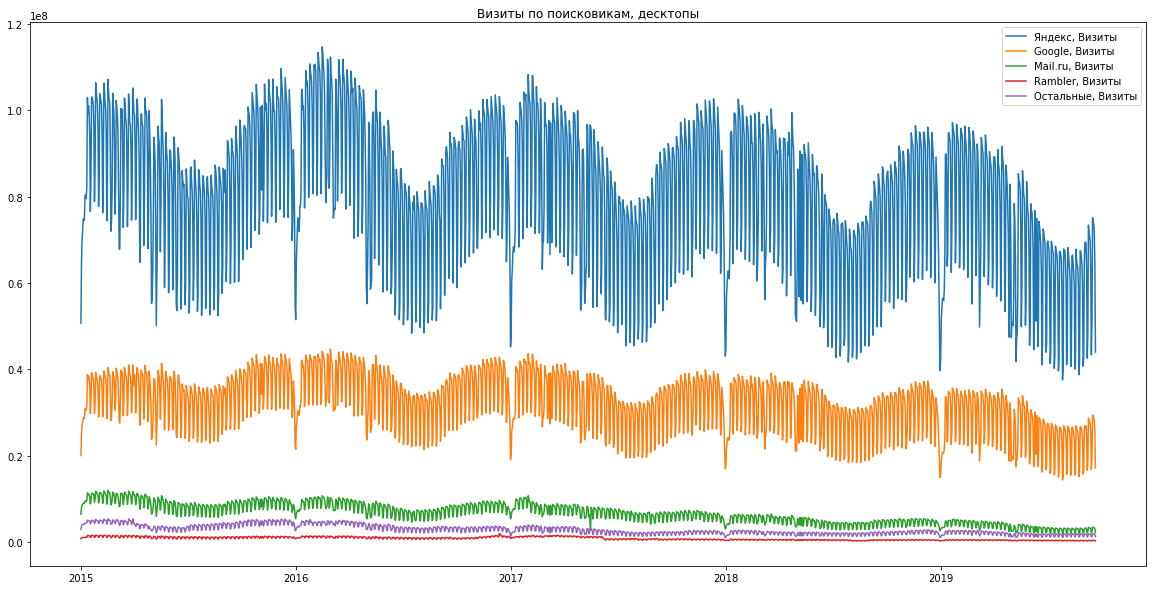

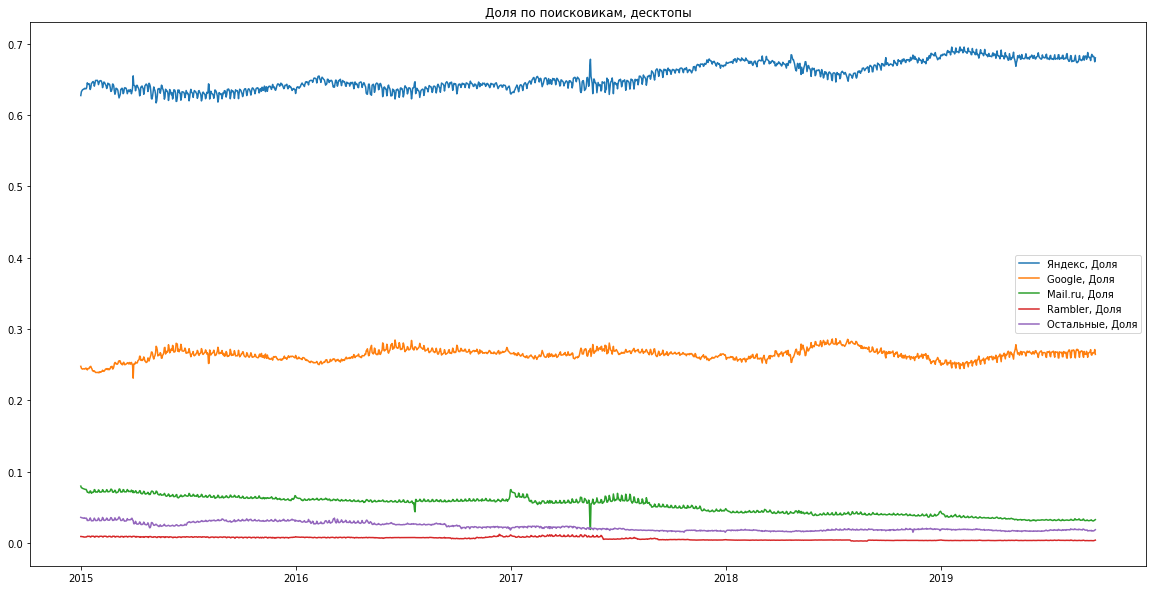

In [308]:
fig = plt.figure(figsize = (20,10))
ax1 = plt.subplot(1,1,1)
#ax1.set_xticks(search.index)
#ax1.set_xticklabels(search['month'],
#                   fontsize = 10,   #  Размер шрифта
#                   color = 'black',    #  Цвет текста
#                   rotation = 90,   #  Поворот текста
#                   verticalalignment =  'top')    #  Вертикальное выравнивание
plt.plot(
    search['date'],
    search[['Яндекс, Визиты', 'Google, Визиты', 'Mail.ru, Визиты', 'Rambler, Визиты', 'Остальные, Визиты']], 
#    label = {'Яндекс, Визиты':'2'}
);
#ax1.set_label('test')
ax1.legend(['Яндекс, Визиты', 'Google, Визиты', 'Mail.ru, Визиты', 'Rambler, Визиты', 'Остальные, Визиты'])

ax1.set_title('Визиты по поисковикам, десктопы')




fig = plt.figure(figsize = (20,10))
ax2 = plt.subplot(1,1,1);
plt.plot(
    search['date'],
    search[['Яндекс, Доля', 'Google, Доля', 'Mail.ru, Доля', 'Rambler, Доля', 'Остальные, Доля']]);
#plt.plot(search['date'],search['Google, Доля']);
ax2.legend(['Яндекс, Доля', 'Google, Доля', 'Mail.ru, Доля', 'Rambler, Доля', 'Остальные, Доля'])
ax2.set_title('Доля по поисковикам, десктопы');

### Визиты: видно падение визитов (понижающийся тренд) по десктопам
### Доли: 
    - виден рост яндекса, противофаза гугла (яндекс растет / гугл снижается и наоборот) по cреднесрочным периодам (от полугода)
    - доля гугла находится в диапазоне 20-30%
    - яндекс растет от 63 до 68-69%
    - мэйл.ру снижается в сторону 0 (понижающийся тренд)
    - рамблер "болтается" в области 0
    

### Рассчитаем среднемесячные доли

In [309]:
month = search.groupby('month').agg(
    {'Яндекс, Визиты':'mean', 
     'Google, Визиты':'mean', 
     'Mail.ru, Визиты':'mean', 
     'Rambler, Визиты':'mean', 
     'Остальные, Визиты':'mean',
     'Яндекс, Доля':'mean', 
     'Google, Доля':'mean', 
     'Mail.ru, Доля':'mean',
     'Rambler, Доля':'mean', 
     'Остальные, Доля':'mean'
}).reset_index()
month.head()

,month,"Яндекс, Визиты","Google, Визиты","Mail.ru, Визиты","Rambler, Визиты","Остальные, Визиты","Яндекс, Доля","Google, Доля","Mail.ru, Доля","Rambler, Доля","Остальные, Доля"
0,2015-01,8.773825e+07,3.320814e+07,9.980992e+06,1.238694e+06,4.521064e+06,0.641116,0.243146,0.073395,0.009017,0.033325
1,2015-02,9.363534e+07,3.551196e+07,1.058370e+07,1.335944e+06,4.781449e+06,0.641561,0.243659,0.072717,0.009121,0.032942
2,2015-03,9.106640e+07,3.599802e+07,1.039516e+07,1.291274e+06,4.685793e+06,0.634428,0.251175,0.072626,0.008964,0.032807
3,2015-04,8.972801e+07,3.594789e+07,9.876567e+06,1.229087e+06,3.708322e+06,0.638172,0.256167,0.070431,0.008712,0.026519
4,2015-05,7.916688e+07,3.329001e+07,8.581049e+06,1.054995e+06,3.104086e+06,0.631218,0.266590,0.068826,0.008378,0.024988


### Рассчитаем средненедельные доли

In [310]:
week = search.groupby('week').agg(
    {'Яндекс, Визиты':'mean', 
     'Google, Визиты':'mean', 
     'Mail.ru, Визиты':'mean', 
     'Rambler, Визиты':'mean', 
     'Остальные, Визиты':'mean',
     'Яндекс, Доля':'mean', 
     'Google, Доля':'mean', 
     'Mail.ru, Доля':'mean',
     'Rambler, Доля':'mean', 
     'Остальные, Доля':'mean'
}).reset_index()
week.head()

,week,"Яндекс, Визиты","Google, Визиты","Mail.ru, Визиты","Rambler, Визиты","Остальные, Визиты","Яндекс, Доля","Google, Доля","Mail.ru, Доля","Rambler, Доля","Остальные, Доля"
0,2014-12-29,6.466353e+07,2.503406e+07,7.933174e+06,9.236150e+05,3.630712e+06,0.632413,0.245182,0.077786,0.009051,0.035569
1,2015-01-05,7.810892e+07,2.997099e+07,9.244416e+06,1.044278e+06,4.263929e+06,0.636911,0.244388,0.075407,0.008516,0.034777
2,2015-01-12,9.380768e+07,3.584231e+07,1.043136e+07,1.345629e+06,4.742906e+06,0.641483,0.245349,0.071439,0.009170,0.032558
3,2015-01-19,9.571071e+07,3.593658e+07,1.066000e+07,1.367687e+06,4.765322e+06,0.644631,0.242003,0.071974,0.009170,0.032222
4,2015-01-26,9.610448e+07,3.549303e+07,1.071920e+07,1.359868e+06,4.808252e+06,0.647025,0.239033,0.072310,0.009120,0.032513


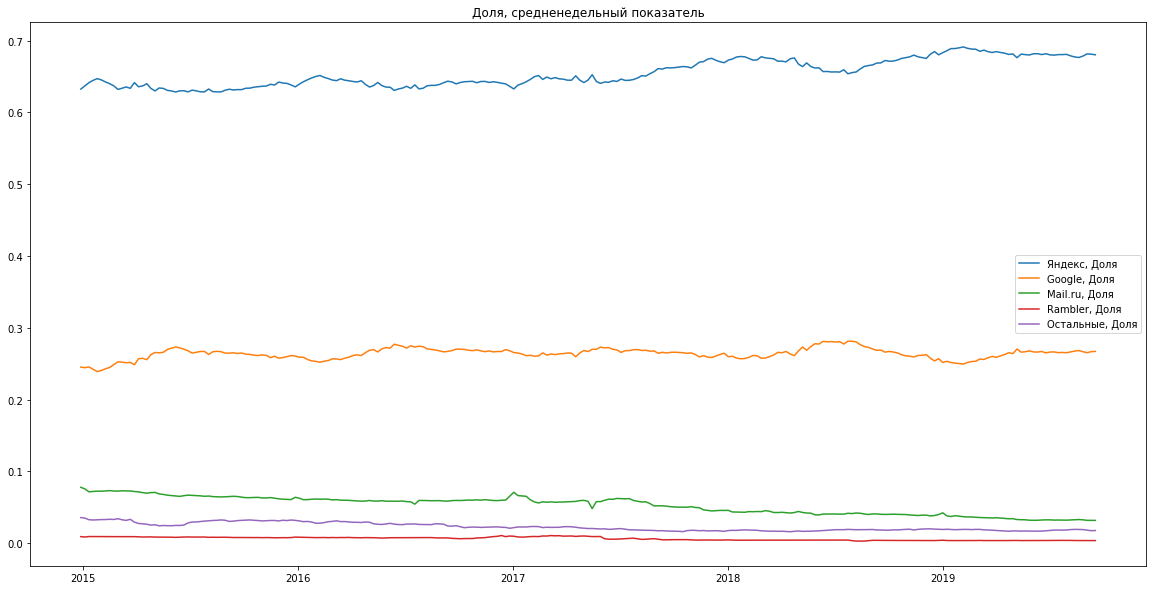

In [311]:
fig = plt.figure(figsize = (20,10))
ax2 = plt.subplot(1,1,1);
#ax2.set_xticks(week.index)
#ax2.set_xtiВизитыcklabels(week['week'],
#                   fontsize = 6,   #  Размер шрифта
#                   color = 'black',    #  Цвет текста
#                  rotation = 90,   #  Поворот текста
#                  verticalalignment =  'top')    #  Вертикальное выравнивание
plt.plot(
    week['week'],
    week[['Яндекс, Доля', 'Google, Доля', 'Mail.ru, Доля', 'Rambler, Доля', 'Остальные, Доля']]);
#plt.plot(search['date'],search['Google, Доля']);
ax2.legend(['Яндекс, Доля', 'Google, Доля', 'Mail.ru, Доля', 'Rambler, Доля', 'Остальные, Доля'])
ax2.set_title('Доля, средненедельный показатель');

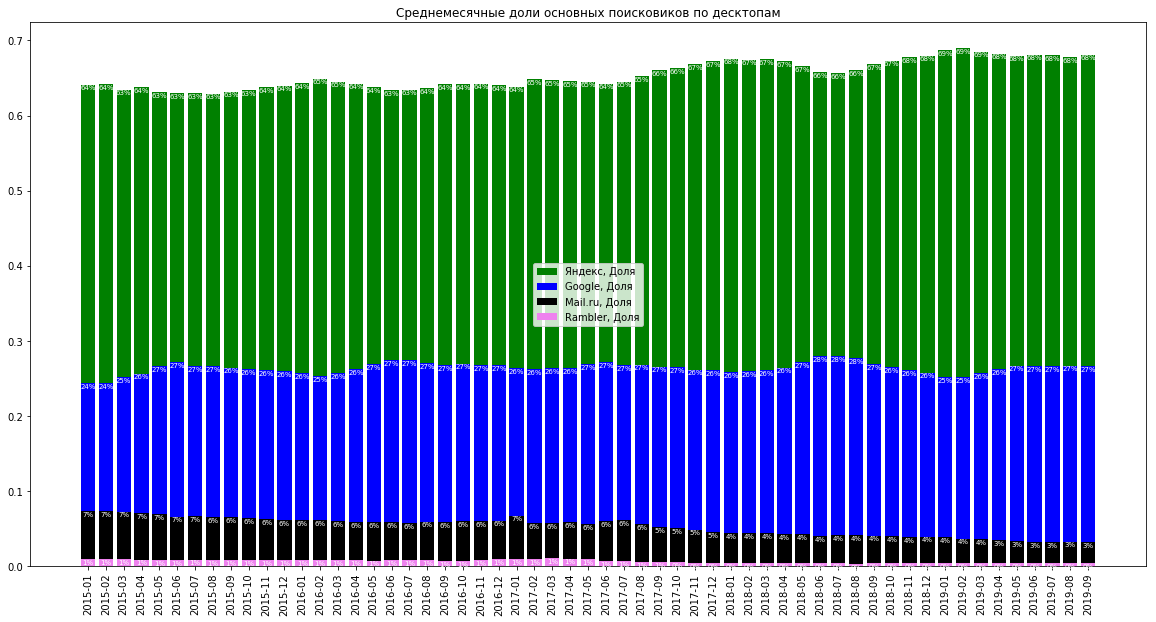

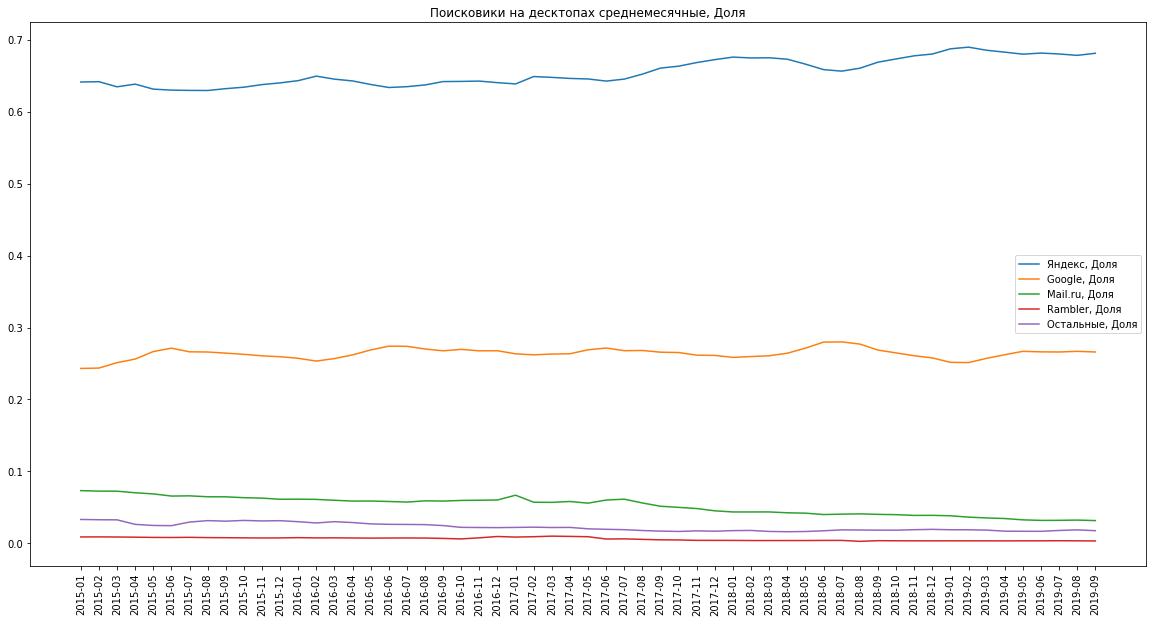

In [312]:
fig = plt.figure(figsize = (20,10))
ax1 = plt.subplot(1,1,1)
#ax1.set_xticks(search.index)
ax1.set_xticklabels(month['month'],
#                   fontsize = 10,   #  Размер шрифта
#                   color = 'black',    #  Цвет текста
                  rotation = 90,   #  Поворот текста
                  verticalalignment =  'top')    #  Вертикальное выравнивание
plt.bar(
    month['month'],
    month['Яндекс, Доля'], 
    color= 'green'
);
plt.bar(
    month['month'],
    month['Google, Доля'],
    color = 'blue'

);

plt.bar(
    month['month'],
    month['Mail.ru, Доля'],
    color = 'black'

);

plt.bar(
    month['month'],
    month['Rambler, Доля'],
    color = 'violet'

);


ax1.legend([
        'Яндекс, Доля',
        'Google, Доля',
        'Mail.ru, Доля',
        'Rambler, Доля'
    ],
          loc='center')

ax1.set_title('Среднемесячные доли основных поисковиков по десктопам')



for p in ax1.patches: 
    ax1.text(p.get_x() + p.get_width()/2 ,
            p.get_y() + p.get_height(),
            '{:.0%}'.format(p.get_height()), 
            fontsize=7,
            color='white',
            ha='center',
            va='top',
           )
    
fig = plt.figure(figsize = (20,10))
ax2 = plt.subplot(1,1,1);
ax2.set_xticklabels(month['month'],
#                   fontsize = 10,   #  Размер шрифта
#                   color = 'black',    #  Цвет текста
                  rotation = 90,   #  Поворот текста
                  verticalalignment =  'top')    #  Вертикальное выравнивание
plt.plot(
    month['month'],
    month[['Яндекс, Доля', 'Google, Доля', 'Mail.ru, Доля', 'Rambler, Доля', 'Остальные, Доля']]);
#plt.plot(search['date'],search['Google, Доля']);
ax2.legend(['Яндекс, Доля', 'Google, Доля', 'Mail.ru, Доля', 'Rambler, Доля', 'Остальные, Доля'])
ax2.set_title('Поисковики на десктопах среднемесячные, Доля');

### Среднемесячные , средненедельные данные: 
Как было описано выше :
    - видны противофазные колебания гугла и яндекса на весах: прирост / падение
    - гугл с 24% с начала периода вырос до 27% в конце периода - темп прироста 12.5%
    - яндекс с 64% с начала периода вырос до 68% в конце периода (69% в марте 2019) - темп прироста 7.8%
    - mail.ru с 7% упал до 4% 
    - rambler снижается от 1% в сторону 0

### Отразим на ежедневных графиках сравнение по годам доли яндекса

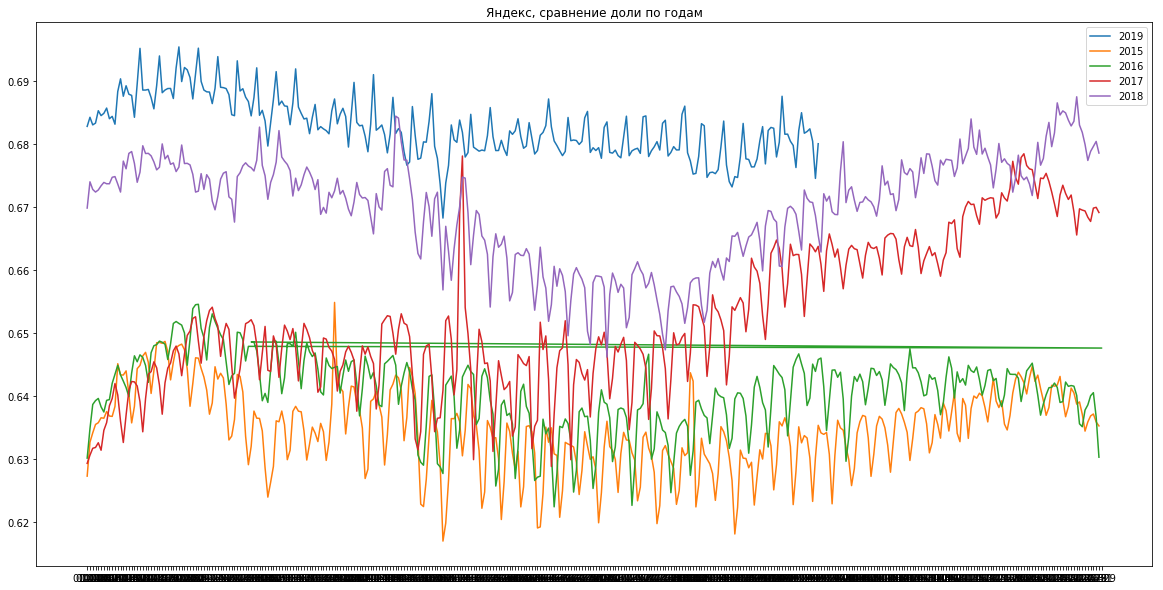

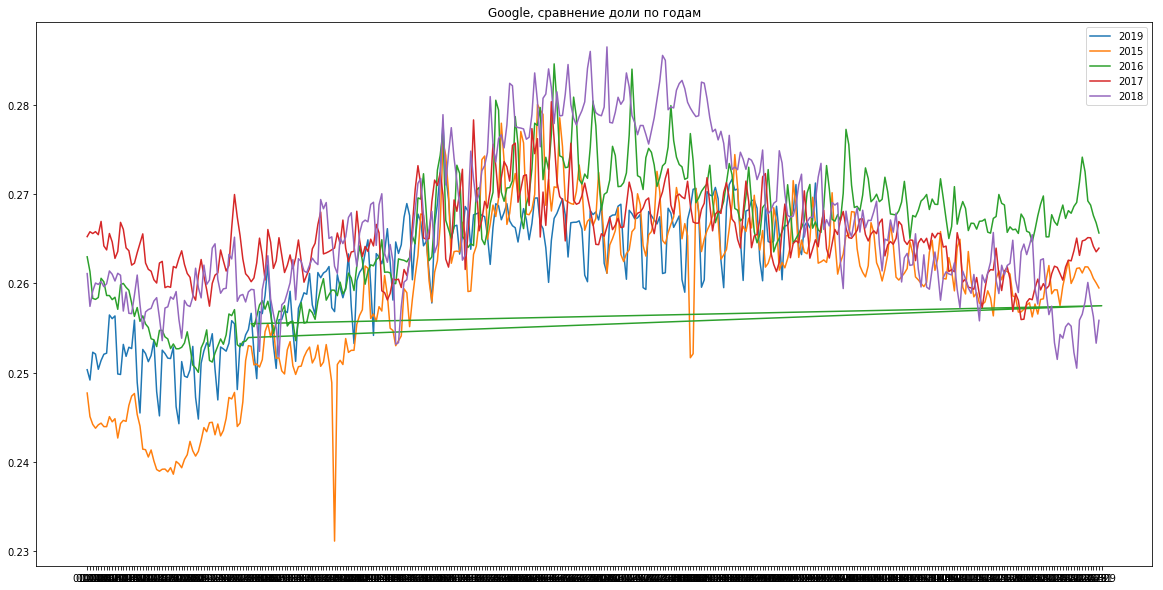

In [313]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize = (20,10))
ax1 = plt.subplot(1,1,1)
years = [2019,2015,2016,2017,2018]
for year in years:
    df = search[
            (search['date']>=pd.to_datetime(str(year)+'-01-01', format='%Y-%m-%d')) & 
             (search['date']<=pd.to_datetime(str(year)+'-12-31', format='%Y-%m-%d'))
              ]
    plt.plot(df['noyear'],df['Яндекс, Доля'], label='{}'.format(year))

    ax1.legend()

ax1.set_title('Яндекс, сравнение доли по годам');
    
fig = plt.figure(figsize = (20,10))
ax2 = plt.subplot(1,1,1)
years = [2019,2015,2016,2017,2018]
for year in years:
    df = search[
            (search['date']>=pd.to_datetime(str(year)+'-01-01', format='%Y-%m-%d')) & 
             (search['date']<=pd.to_datetime(str(year)+'-12-31', format='%Y-%m-%d'))
              ]
    plt.plot(df['noyear'],df['Google, Доля'], label='{}'.format(year))

    ax2.legend()
ax2.set_title('Google, сравнение доли по годам');

### Сравнительный график по годам яндекса:
- Виден безусловный рост доли, при том что яндекс занимает явное доминирующее полложение, 
- одновременно видно сильное проседание в 2018 году при это гуг показал существенный рост
- снова видны противофазные качели, которые могут говорить о борьбе маркетинговых бюджетов за аудиторию поисковиков, которую выигрывает яндекс в абсолютных показателях, но проигрывает в относительных - Темп прироста 12,5% гугла против 7.8% яндекса

### Сформируем данные по доли поисковиков в разрезе дней недели

In [314]:
weekdays_dict = [(0, 'Пн'),(1, 'Вт'),(2, 'Ср'),(3, 'Чт'),(4, 'Пт'),(5, 'Сб'),(6, 'Вс')]

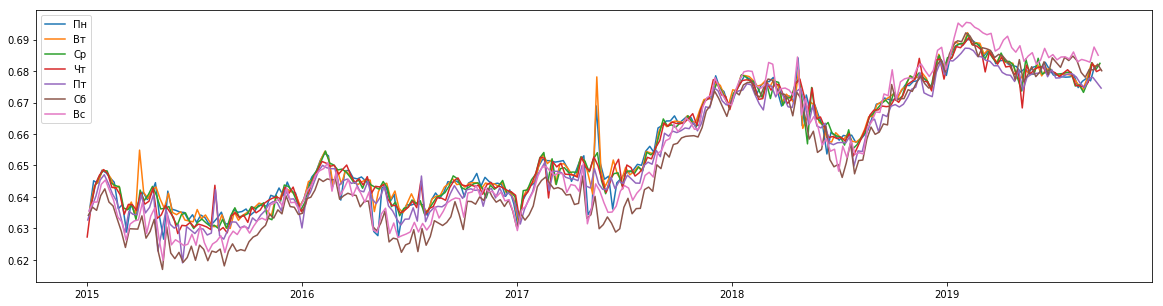

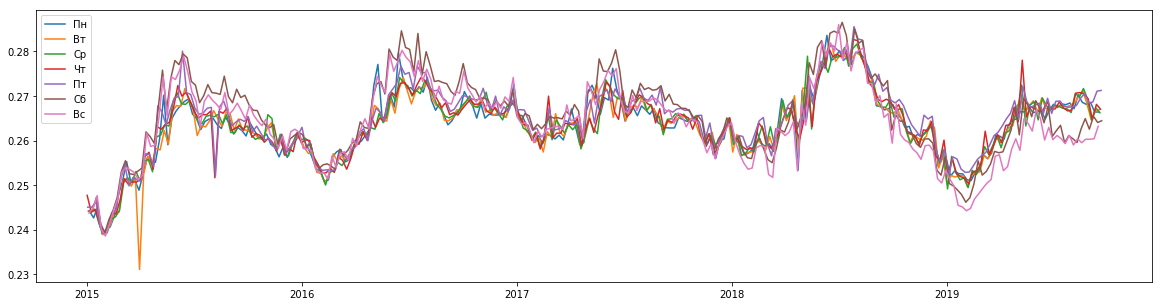

In [315]:
fig = plt.figure(figsize = (20,5))
ax1 = plt.subplot(1,1,1)
years = [2019,2015,2016,2017,2018]
for weekday in weekdays_dict:
    df = search[search['weekday'] == weekday[0]]
    plt.plot(df['date'],df['Яндекс, Доля'], label='{}'.format(weekday[1]))
    

ax1.legend()

fig = plt.figure(figsize = (20,5))
ax2 = plt.subplot(1,1,1)
years = [2019,2015,2016,2017,2018]
for weekday in weekdays_dict:
    df = search[search['weekday'] == weekday[0]]
    plt.plot(df['date'],df['Google, Доля'], label='{}'.format(weekday[1]))
    

ax2.legend()





### Анализ доли по дням недели:
- Гугл:
    - вначале периода доли выходных дней лидировали по сравнению с рабочими днями, в конце периода в лидеры вырвался яндекс.
    - в нерабочие дни доля повысилась у гугла (корпоративный сектор с десктопами на рабочих местах) 

# Общий вывод

### Визиты:
#### При анализе визитов наблюдается
1. ярко выраженная сезонность:
    - рост начиная с сентября
    - пик посещаемости в декабре
    - сильно падение в новогодние праздники, майские праздники
    - спад с декабря до минимума в июне-июле
2. Тренд на снижение по количеству визитов от устройств "desktop" для всех поисковых систем
3. С середины 2018 года поисковик яндекс показал умереннный рост по устройствам десктоп. Прирост был обеспечен за счет падения поисковика google и mail.ru

### Поисковая доля
#### При анализе поисковой доли наблюдается:
1. Плавный прирост от 62,9% в 2015 (среднемесячный показатель) до 68% (текущий показатель), в сентябре 2009 значение доходило до 69%
2. С февраля 2017 года поисковик яндекс показал умереннный рост по устройствам десктоп от 64 до 69% (09-2019). Прирост был обеспечен за счет отъедания доли у поисковиков google и mail.ru
3. Вместе с тем, видна зависимость при приростах / падениях поисковика google - yandex показывает аналогичные пдения / приросты в противофазе:
    - сентябрь 2017 - февраль 2018 - яндекс на подъеме / гугл в падении, март 2018 - август 2018 - яндекс падает / гугл растет (термины падени / рост - относительные - рост доли (среднемесячная) с 64% до 67%, падение с 68% до 66%)
 
### Месячный нализ:
1. Обзор
    - виден рост яндекса, противофаза гугла (яндекс растет / гугл снижается и наоборот) по cреднесрочным периодам 
     - видны противофазные колебания гугла и яндекса на весах: прирост / падение
    - гугл с 24% с начала периода вырос до 27% в конце периода - темп прироста 12.5%
    - яндекс с 64% с начала периода вырос до 68% в конце периода (69% в марте 2019) - темп прироста 7.8%
    - mail.ru с 7% упал до 4% 
    - rambler снижается от 1% в сторону 0
    - Виден безусловный рост доли, при том что яндекс занимает явное доминирующее полложение, 
    - одновременно видно сильное проседание в 2018 году при это гуг показал существенный рост
    - снова видны противофазные качели, которые могут говорить о борьбе маркетинговых бюджетов за аудиторию поисковиков, которую выигрывает яндекс в абсолютных показателях, но проигрывает в относительных - Темп прироста 12,5% гугла против 7.8% яндекса   


### Анализ доли по дням недели:
    - вначале периода доли выходных дней лидировали по сравнению с рабочими днями, в конце периода в лидеры вырвался яндекс (помогает мощная платформа поисковика и развлечений).
    - в нерабочие дни доля повысилась у гугла (корпоративный сектор с десктопами на рабочих местах) 